# Spiral Experiment

We will perform the sphere reconstruction process with spiral data-generating process

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '..'))

import torch

from data.generation import SpiralRotation, Patches
from visualization_utils.spheres import visualize_spheres_side_by_side, scatter3d_sphere
from encoders import SphericalEncoder

from encoders import get_mlp

import matplotlib.pyplot as plt
from simclr.simclr import SimCLR
from spaces import NSphereSpace

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using', device)

/home/justinas/CLTheory/.pixi/envs/default/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using cuda


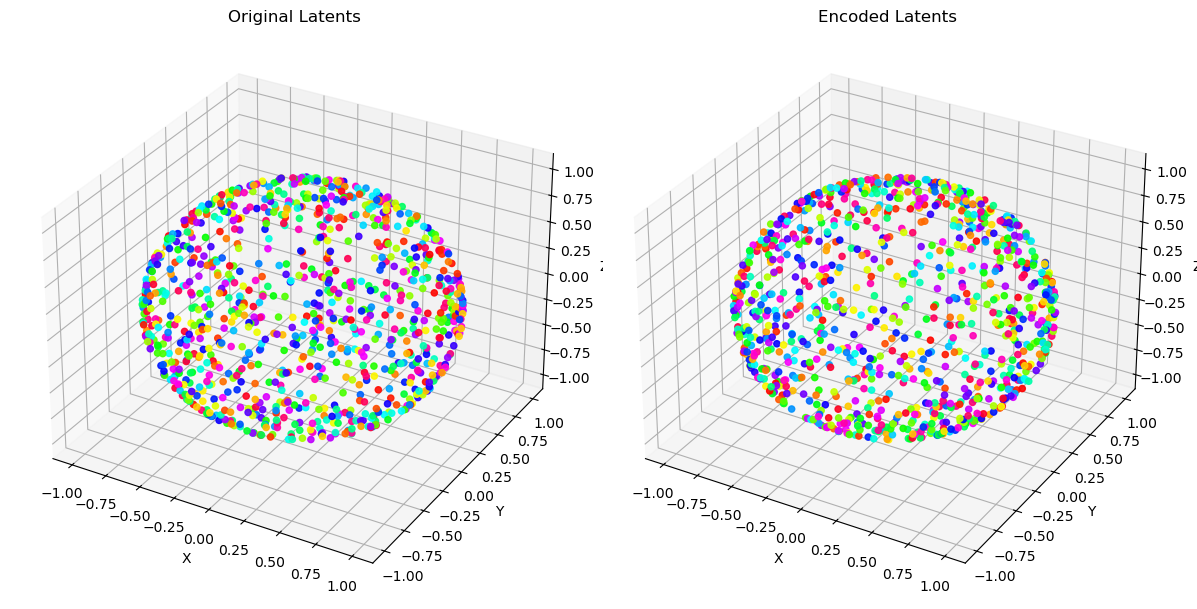

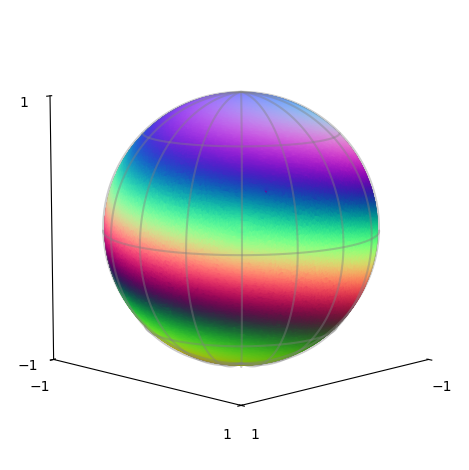

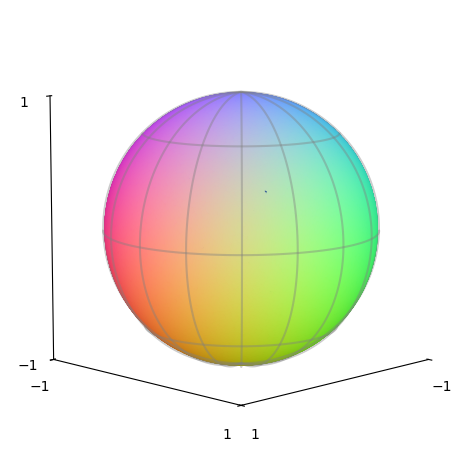

In [3]:
sphere = NSphereSpace(3)
g_spiral = SpiralRotation(2)

z = sphere.uniform(1000)

visualize_spheres_side_by_side(plt, z, g_spiral(z))

z = sphere.uniform(100000)
fig = scatter3d_sphere(plt, z, g_spiral(z), s=10, a=.8)
fig = scatter3d_sphere(plt, z, z, s=10, a=.8)

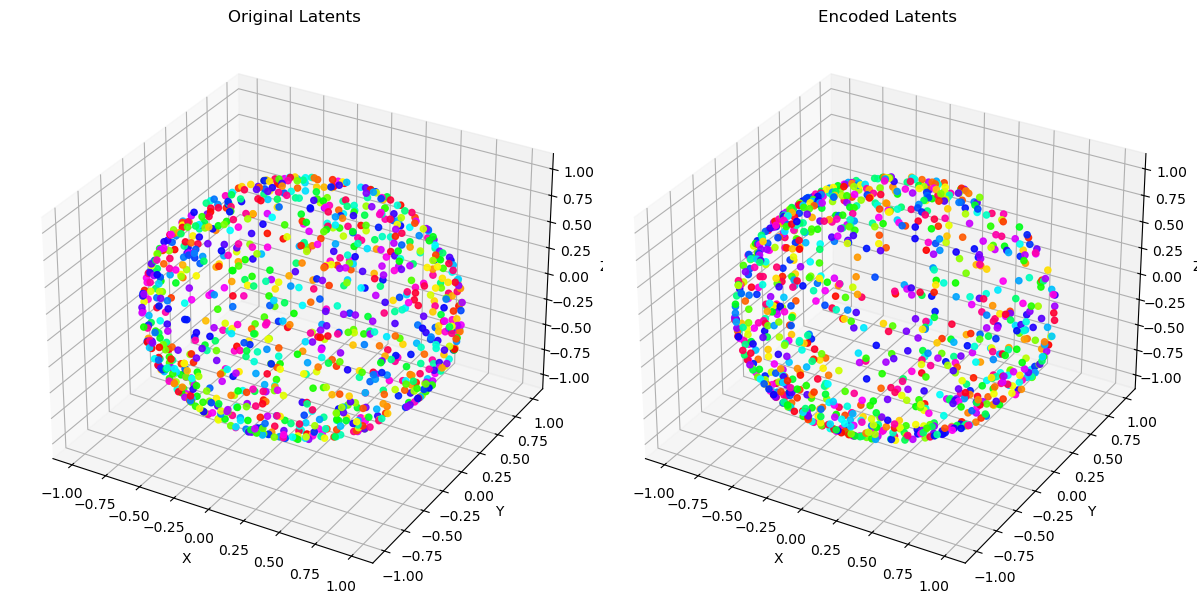

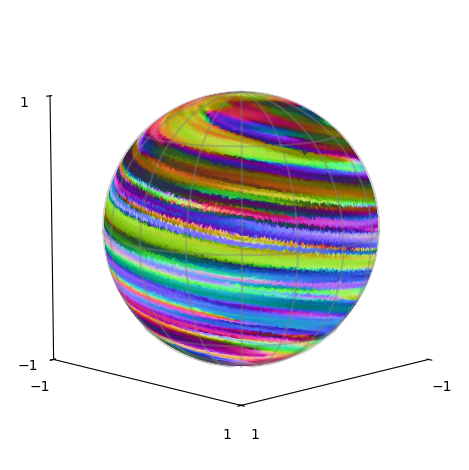

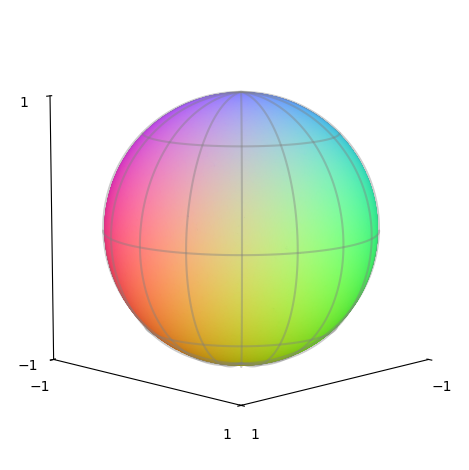

In [25]:
tau = 0.3
kappa = 1 / tau

iterations = 10000
batch = 6144

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

f = SphericalEncoder(hidden_dims=[128, 256, 256, 256, 256, 256, 256, 128])

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000)
z_enc = h(z)

# Add coloring corresponding to initial points

visualize_spheres_side_by_side(plt, z, z_enc)

z = sphere.uniform(100000).to(device)
z_enc = h(z.cpu())

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 9.495515823364258 Samples processed: 1 linear disentanglement: 0.19301126897335052 permutation disentanglement: 0.1869284063577652 angle_preservation_error: 0.2851024270057678
Loss: 8.054479598999023 Samples processed: 21 linear disentanglement: 0.8757993578910828 permutation disentanglement: 0.3071540892124176 angle_preservation_error: 0.1108471229672432
Loss: 7.862443923950195 Samples processed: 41 linear disentanglement: 0.9867907166481018 permutation disentanglement: 0.3134170472621918 angle_preservation_error: 0.03839487582445145
Loss: 7.819740295410156 Samples processed: 61 linear disentanglement: 0.9932971596717834 permutation disentanglement: 0.31719836592674255 angle_preservation_error: 0.02688928321003914
Loss: 7.806303977966309 Samples processed: 81 linear disentanglement: 0.9943292737007141 permutation disentanglement: 0.31726551055908203 angle_preservation_error: 0.02451929822564125
Loss: 7.825292110443115 Samp

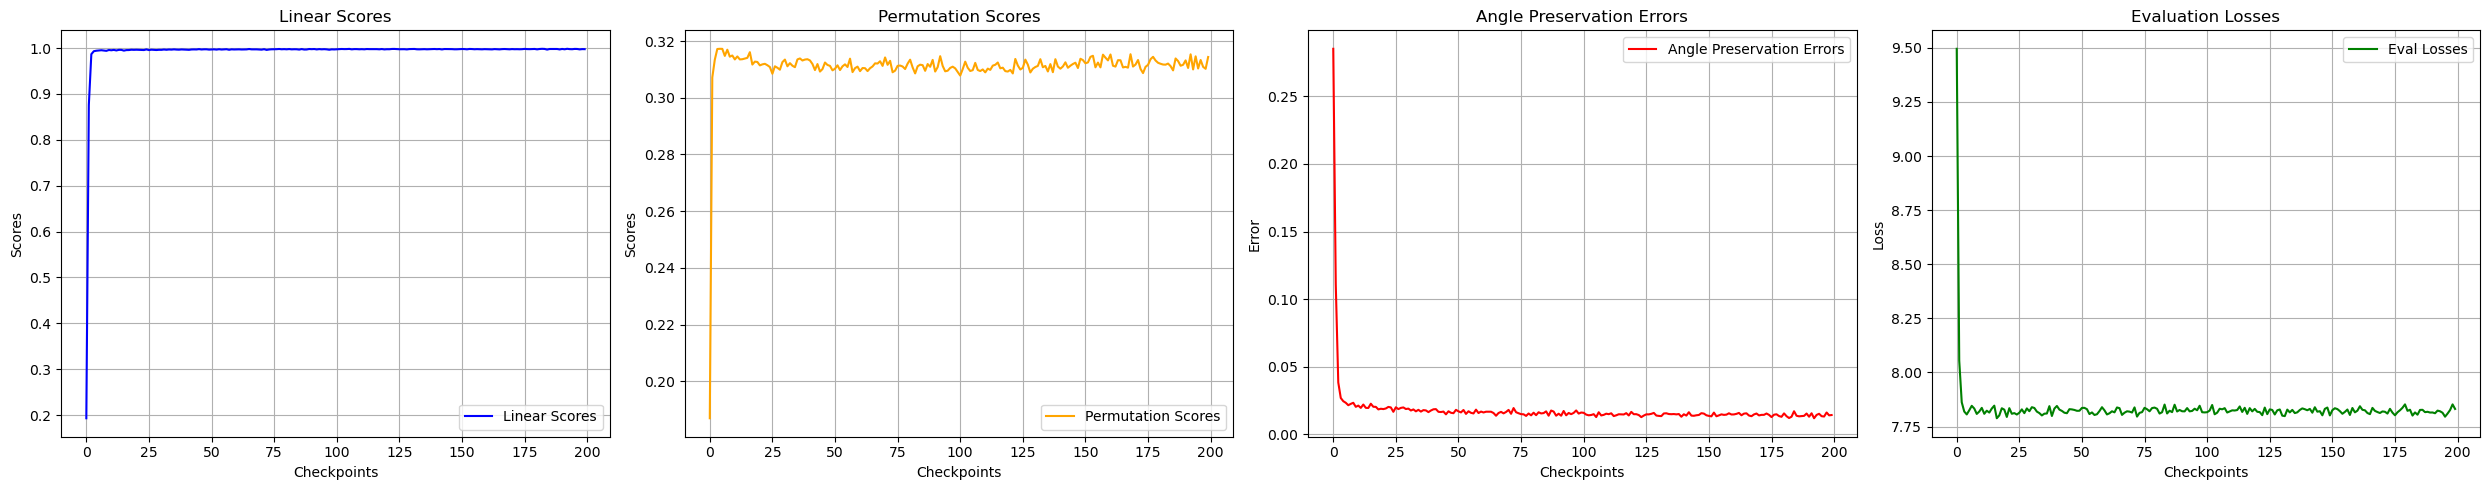

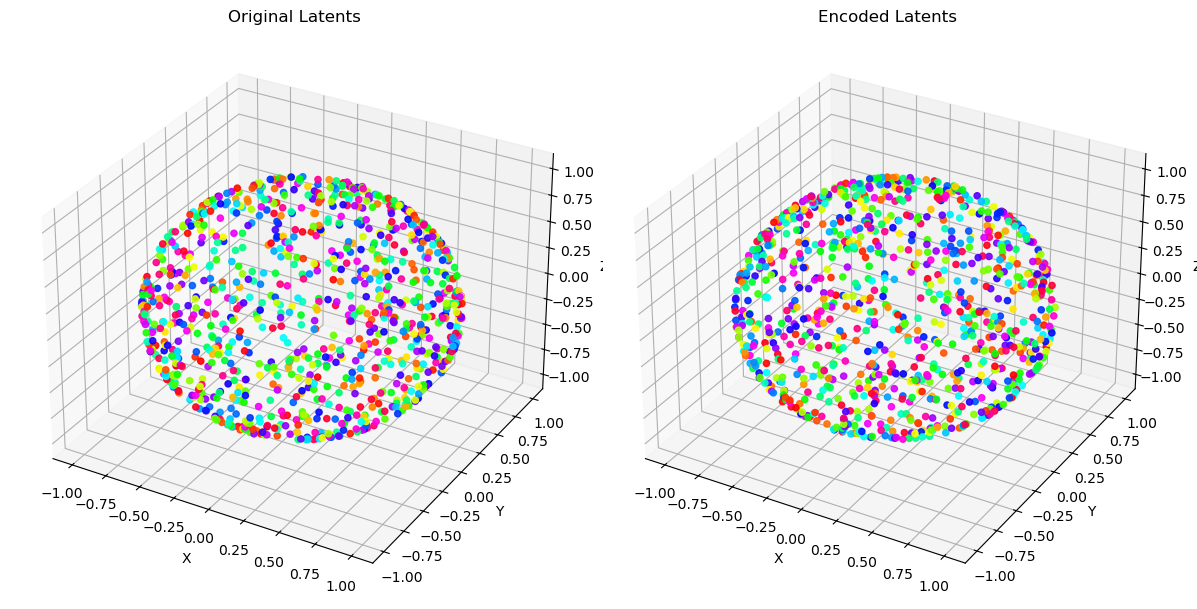

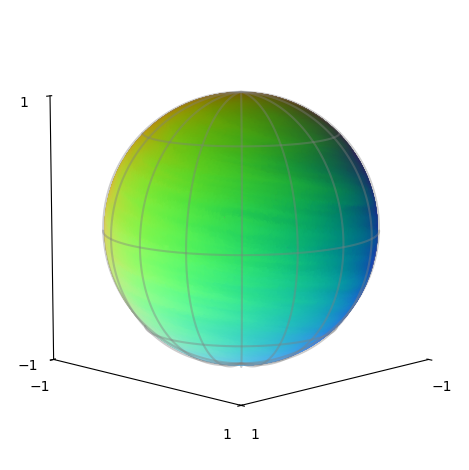

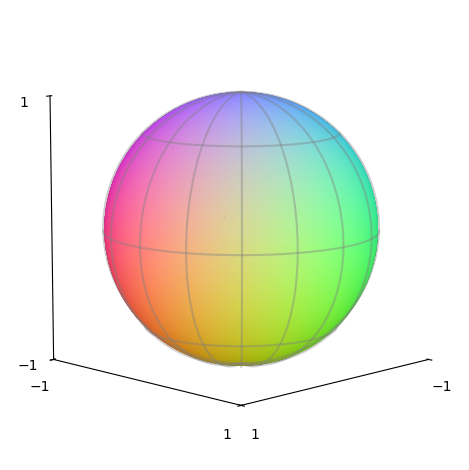

In [26]:
from visualization_utils.scoring import plot_scores

iterations = 4000

simclr_vmf = SimCLR(
    f, g_spiral, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f, scores = simclr_vmf.train(batch, iterations)

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000).to(device)
z_enc = h(z).to(device)

plot_scores(plt, scores)
visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

z = sphere.uniform(100000).to(device)
z_enc = h(z).to(device)

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)